<a href="https://colab.research.google.com/github/astrodatos/proyecto_ps2/blob/master/Pruebasexoplanetas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [140]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
import pandas as pd
!pip install astroquery
from astroquery.gaia import Gaia
data = Gaia.launch_job("""SELECT TOP 2000 gaia_source.source_id,gaia_source.ra,gaia_source.ra_error,gaia_source.dec,gaia_source.dec_error,gaia_source.phot_g_mean_mag,gaia_source.bp_rp,gaia_source.g_rp,gaia_source.phot_variable_flag,gaia_source.teff_val,gaia_source.a_g_val,gaia_source.radius_val,gaia_source.lum_val
FROM gaiadr2.gaia_source""")

In [141]:
planetas=pd.read_csv("https://github.com/astrodatos/proyecto_ps2/raw/master/planets_2019.06.05_08.19.19.csv")
column_dict = {
'fpl_hostname':'Host Name', 
'fpl_letter':'Planet Letter', 
'fpl_name':'Planet Name', 
'fpl_controvflag':'Controversial Flag'
}
planetas.rename(columns=column_dict, inplace=True)
planetas


,loc_rowid,pl_hostname,pl_letter,pl_name,pl_discmethod,pl_orbper,pl_orbpererr1,pl_orbpererr2,pl_orbperlim,pl_orbsmax,pl_orbsmaxerr1,pl_orbsmaxerr2,pl_orbsmaxlim,pl_orbeccen,pl_orbeccenerr1,pl_orbeccenerr2,pl_orbeccenlim,pl_orbincl,pl_orbinclerr1,pl_orbinclerr2,pl_orbincllim,pl_bmassj,pl_bmassjerr1,pl_bmassjerr2,pl_bmassjlim,pl_radj,pl_radjerr1,pl_radjerr2,pl_radjlim,pl_dens,pl_denserr1,pl_denserr2,pl_denslim,ra_str,ra,dec_str,dec,st_dist,st_disterr1,st_disterr2,st_distlim,gaia_gmag,gaia_gmagerr,gaia_gmaglim,st_teff,st_tefferr1,st_tefferr2,st_tefflim,st_rad,st_raderr1,st_raderr2,st_radlim,pl_facility
0,1,11 Com,b,11 Com b,Radial Velocity,326.030000,0.320000,-0.320000,0.0,1.290000,0.050000,-0.050000,0.0,0.2310,0.0050,-0.0050,0.0,NaN,NaN,NaN,NaN,19.40000,1.50000,-1.50000,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12h20m43.03s,185.179276,+17d47m34.3s,17.792868,93.37,1.92,-1.92,0.0,4.372,NaN,0.0,4742.0,100.0,-100.0,0.0,19.00,2.00,-2.00,0.0,Xinglong Station
1,2,11 UMi,b,11 UMi b,Radial Velocity,516.219970,3.200000,-3.200000,0.0,1.530000,0.070000,-0.070000,0.0,0.0800,0.0300,-0.0300,0.0,NaN,NaN,NaN,0.0,14.74000,2.50000,-2.50000,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,15h17m05.89s,229.274536,+71d49m26.0s,71.823898,125.72,1.97,-1.97,0.0,4.500,NaN,0.0,4213.0,46.0,-46.0,0.0,29.79,2.84,-2.84,0.0,Thueringer Landessternwarte Tautenburg
2,3,14 And,b,14 And b,Radial Velocity,185.840000,0.230000,-0.230000,0.0,0.830000,NaN,NaN,0.0,0.0000,NaN,NaN,0.0,NaN,NaN,NaN,NaN,4.80000,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23h31m17.42s,352.822571,+39d14m10.3s,39.236198,75.59,0.71,-0.71,0.0,4.872,NaN,0.0,4813.0,20.0,-20.0,0.0,11.00,1.00,-1.00,0.0,Okayama Astrophysical Observatory
3,4,14 Her,b,14 Her b,Radial Velocity,1773.400020,2.500000,-2.500000,0.0,2.930000,0.080000,-0.080000,0.0,0.3700,0.0000,0.0000,0.0,NaN,NaN,NaN,0.0,4.66000,0.15000,-0.15000,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,16h10m24.31s,242.601303,+43d49m03.5s,43.817646,17.94,0.01,-0.01,0.0,6.379,NaN,0.0,5338.0,25.0,-25.0,0.0,0.93,0.01,-0.01,0.0,W. M. Keck Observatory
4,5,16 Cyg B,b,16 Cyg B b,Radial Velocity,798.500000,1.000000,-1.000000,0.0,1.660000,0.030000,-0.030000,0.0,0.6800,0.0200,-0.0200,0.0,NaN,NaN,NaN,0.0,1.78000,0.08000,-0.08000,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,19h41m51.97s,295.466553,+50d31m03.1s,50.517525,21.41,0.23,-0.23,0.0,6.057,NaN,0.0,5750.0,8.0,-8.0,0.0,1.13,0.01,-0.01,0.0,Multiple Observatories
5,6,18 Del,b,18 Del b,Radial Velocity,993.300000,3.200000,-3.200000,0.0,2.600000,NaN,NaN,0.0,0.0800,0.0100,-0.0100,0.0,NaN,NaN,NaN,NaN,10.30000,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20h58m25.94s,314.608063,+10d50m21.4s,10.839286,76.38,0.62,-0.62,0.0,5.244,NaN,0.0,4979.0,18.0,-18.0,0.0,8.50,NaN,NaN,0.0,Okayama Astrophysical Observatory
6,7,1RXS J160929.1-210524,b,1RXS J160929.1-210524 b,Imaging,NaN,NaN,NaN,NaN,330.000000,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.00000,1.00000,-1.00000,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16h09m30.30s,242.376268,-21d04m58.9s,-21.083036,145.00,14.00,-14.00,0.0,12.057,NaN,0.0,4060.0,300.0,-200.0,0.0,NaN,NaN,NaN,NaN,Gemini Observatory
7,8,24 Boo,b,24 Boo b,Radial Velocity,30.350600,0.007800,-0.007700,0.0,0.190000,0.012000,-0.009000,0.0,0.0420,0.0480,-0.0290,0.0,NaN,NaN,NaN,0.0,0.91000,0.13000,-0.10000,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,14h28m37.81s,217.157547,+49d50m41.5s,49.844852,96.25,0.64,-0.64,0.0,5.305,NaN,0.0,4893.0,15.0,-15.0,0.0,10.64,0.84,-0.59,0.0,Okayama Astrophysical Observatory
8,9,24 Sex,b,24 Sex b,Radial Velocity,452.800000,2.100000,-4.500000,0.0,1.333000,0.004000,-0.009000,0.0,0.0900,0.1400,-0.0600,0.0,NaN,NaN,NaN,NaN,1.99000,0.26000,-0.38000,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10h23m28.37s,155.868210,-00d54m08.1s,-0.902244,72.21,0.68,-0.68,0.0,6.198,NaN,0.0,5098.0,44.0,-44.0,0.0,4.90,0.08,-0.08,0.0,Lick Observatory
9,10,24 Sex,c,24 Sex c,Radial Velocity,883.000000,32.400000,-13.800000,0.0,2.080000,0.050000,-0.020000,0.0,0.2900,0.1600,-0.0900,0.0,NaN,NaN,NaN,NaN,0.86000,0.35000,-0.22000,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10h23m28.37s,15

In [159]:
def habitables(planetas):
  masa= np.array(planetas['pl_bmassj'])
  radio= np.array(planetas['pl_radj'])
  n = masa.size
  L = []
  for i in range(0,n):
    
    if masa[i]==None or radio[i]==None:
         continue
    elif 0.0015625<masa[i]<0.01572327044 or 0.045<radio[i]<0.454:
      L.append(1)
    else:
      L.append(0)
  return L
  print (L)
a=habitables(planetas)
print(a)


[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 

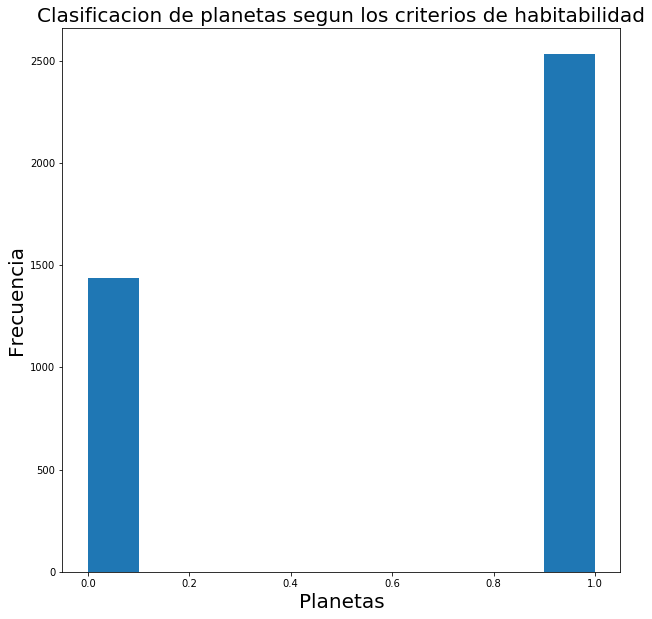

In [164]:
plt.figure(figsize=(10,10))
plt.hist(a)
plt.title('Clasificacion de planetas segun los criterios de habitabilidad',fontsize=20)
plt.ylabel('Frecuencia',fontsize = 20) #se ponen los respectivos nombres y titulos
plt.xlabel('Planetas',fontsize = 20)
plt.savefig('planetas.png')